In [1]:
import gym
from src import algo

2022-02-26 15:16:49.192344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-26 15:16:49.192396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Creating the environment
from env.SimpleMaze import SimpleMaze
env = SimpleMaze(3,5,True)

Map:
0 0 0 0 0 
0 0 * 0 0 
X * G 0 * 


## DQN 1000 timesteps

In [3]:
# Training an RL agent in the environment using given algorithm
model, agent, train_rewards = algo.dqn(env,1000)

2022-02-26 15:16:52.736909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-26 15:16:52.737831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-26 15:16:52.737952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-26 15:16:52.738060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-26 15:16:52.738166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Training for 1000 steps ...
Interval 1 (0 steps performed)
   72/10000 [..............................] - ETA: 14s - reward: -1.0417    

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1000/10000 [==>...........................] - ETA: 1:27 - reward: -0.5200done, took 9.791 seconds


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

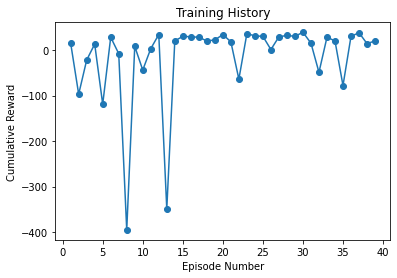

In [4]:
# Visualizing Training History
plt = algo.plot_training(train_rewards)
plt

In [5]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:36<00:00, 636.31it/s]


In [6]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,3)

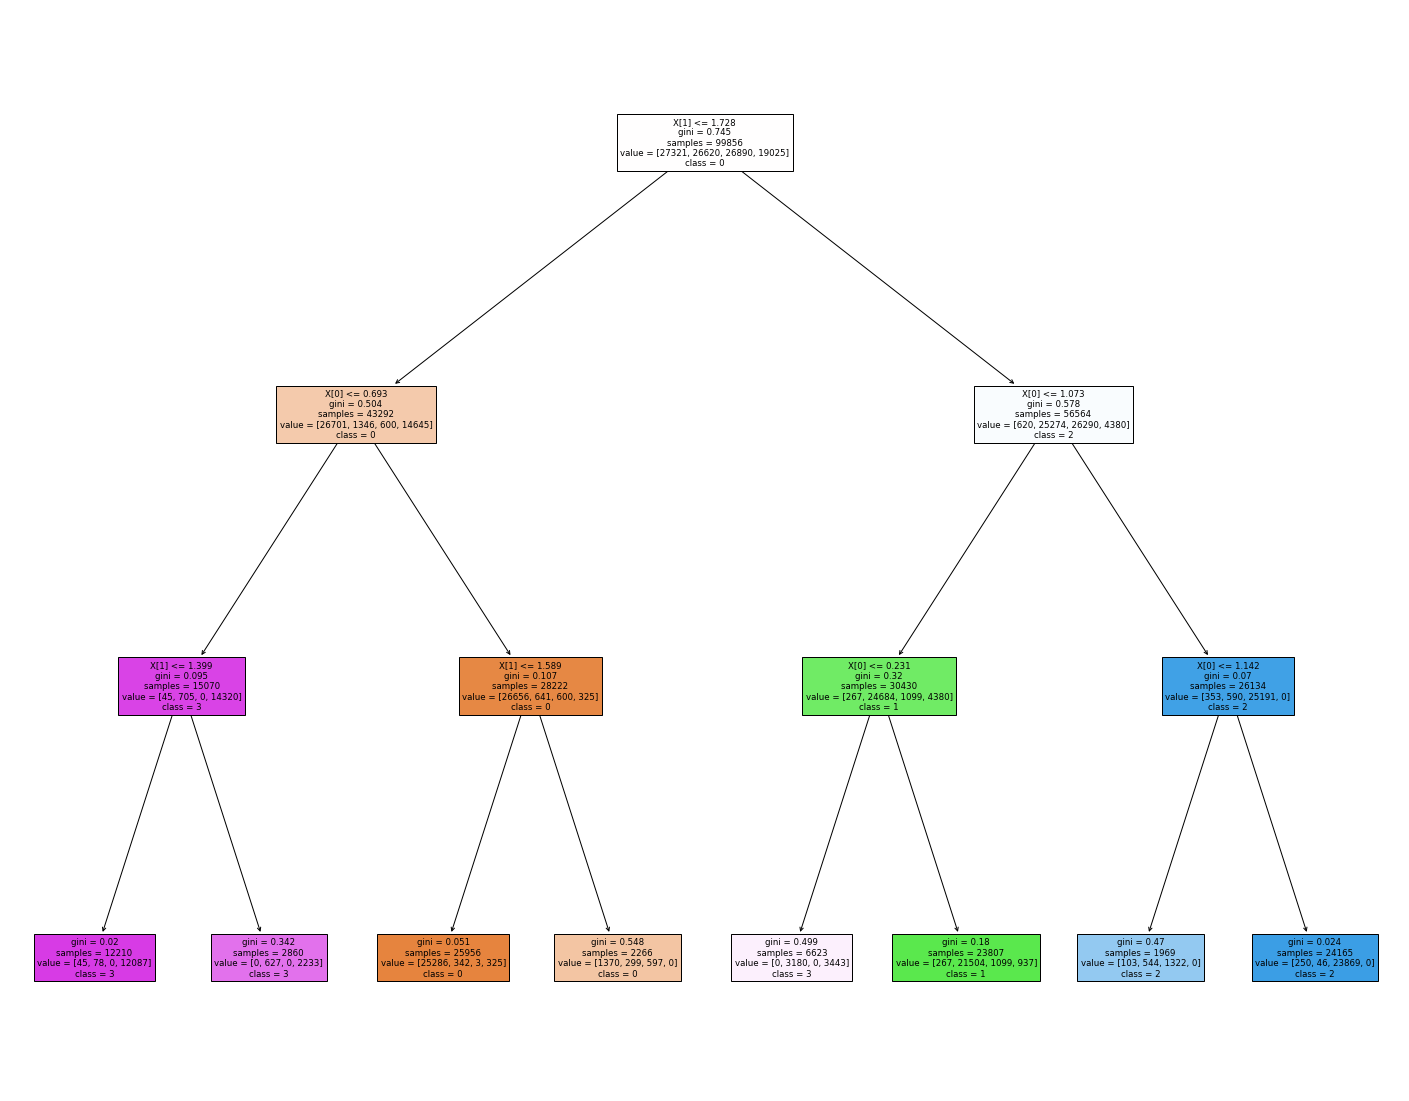

In [7]:
# Visualizing the DT
from src.tree import visualize_tree
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [8]:
# Testing DT against ANN for accuracy
from src.tree import test_tree
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:19<00:00, 522.91it/s]

Instances checked: 10000
Predictions matched: 9144
Accuracy: 91.44%


## DQN 2000 timesteps

In [9]:
# Training an RL agent in the environment using given algorithm
model, agent, train_rewards = algo.dqn(env,2000)

Training for 2000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 28:28 - reward: 10.0000

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1998/10000 [====>.........................] - ETA: 1:48 - reward: -2.4279done, took 27.184 seconds


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

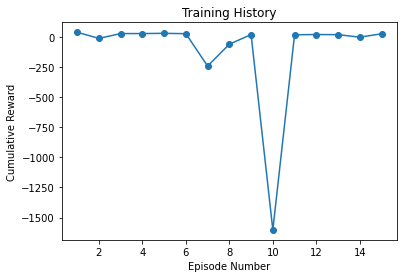

In [10]:
# Visualizing Training History
plt = algo.plot_training(train_rewards)
plt

In [11]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [03:11<00:00, 520.37it/s]


In [12]:
# Building DT from the dataset
Tree = build_tree(env,filename,3)

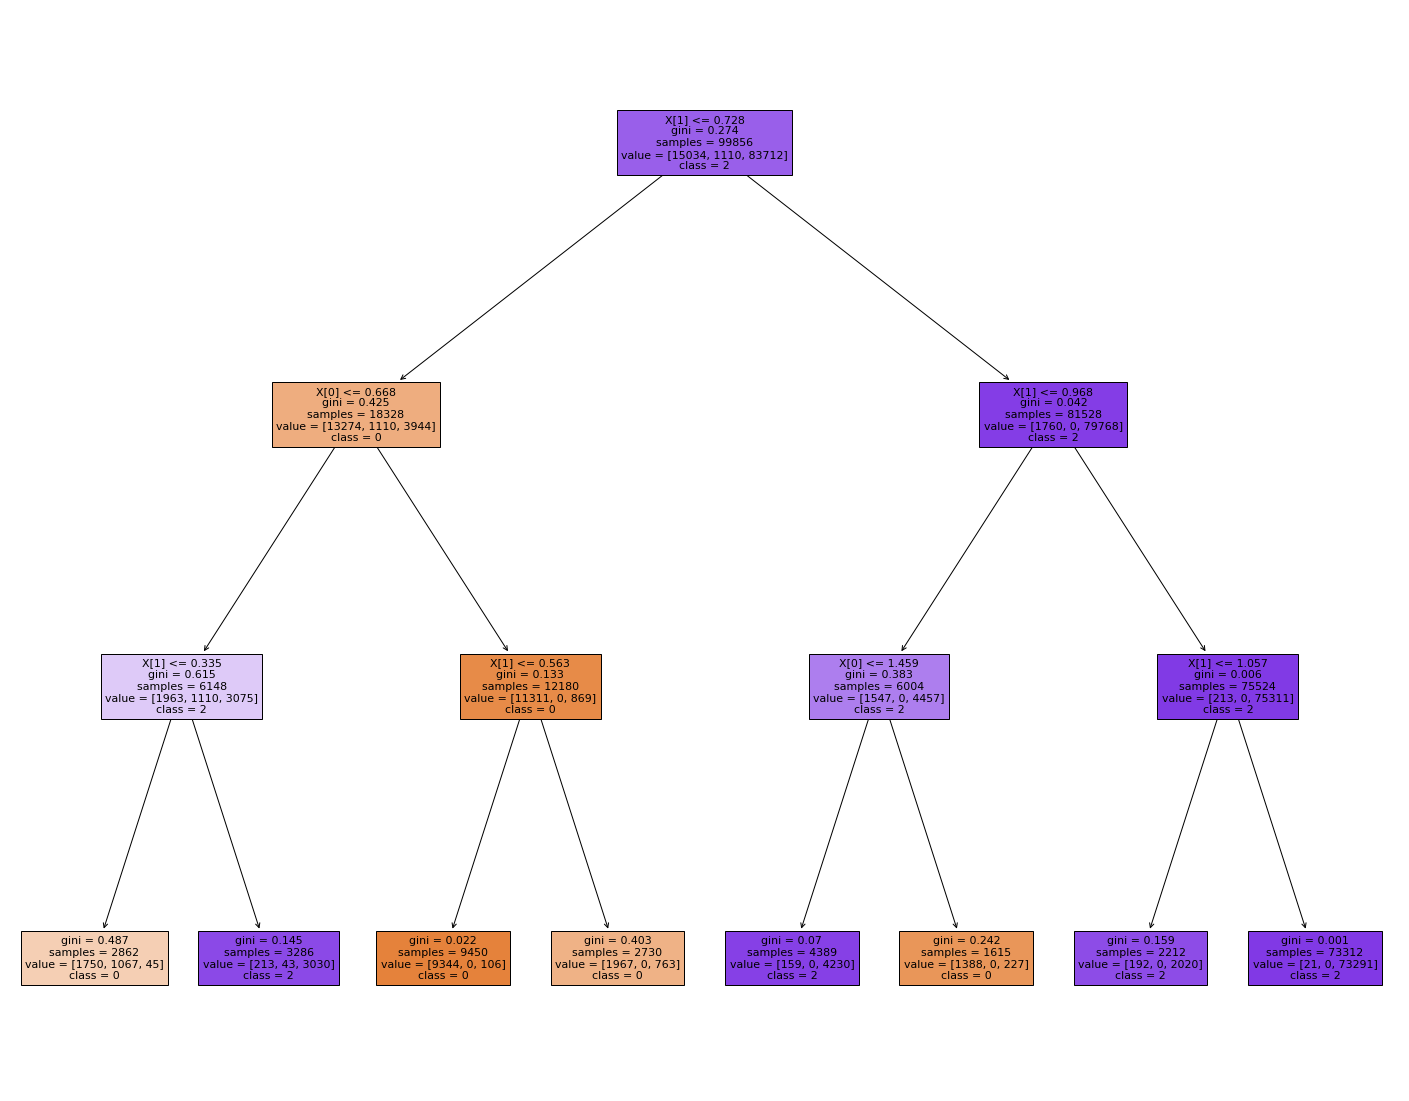

In [13]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [14]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:22<00:00, 439.87it/s]

Instances checked: 10000
Predictions matched: 9719
Accuracy: 97.19%


## DQN 5000 timesteps

In [15]:
# Training an RL agent in the environment using given algorithm
model, agent, train_rewards = algo.dqn(env,5000)

Training for 5000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 4997/10000 [=============>................] - ETA: 1:01 - reward: -3.6206done, took 61.443 seconds


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

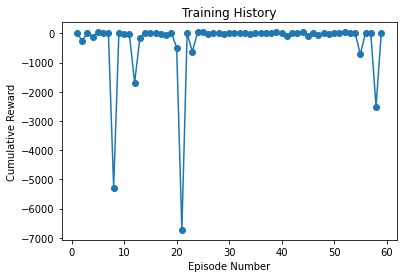

In [16]:
# Visualizing Training History
plt = algo.plot_training(train_rewards)
plt

In [17]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [03:24<00:00, 488.02it/s]


In [18]:
# Building DT from the dataset
Tree = build_tree(env,filename,3)

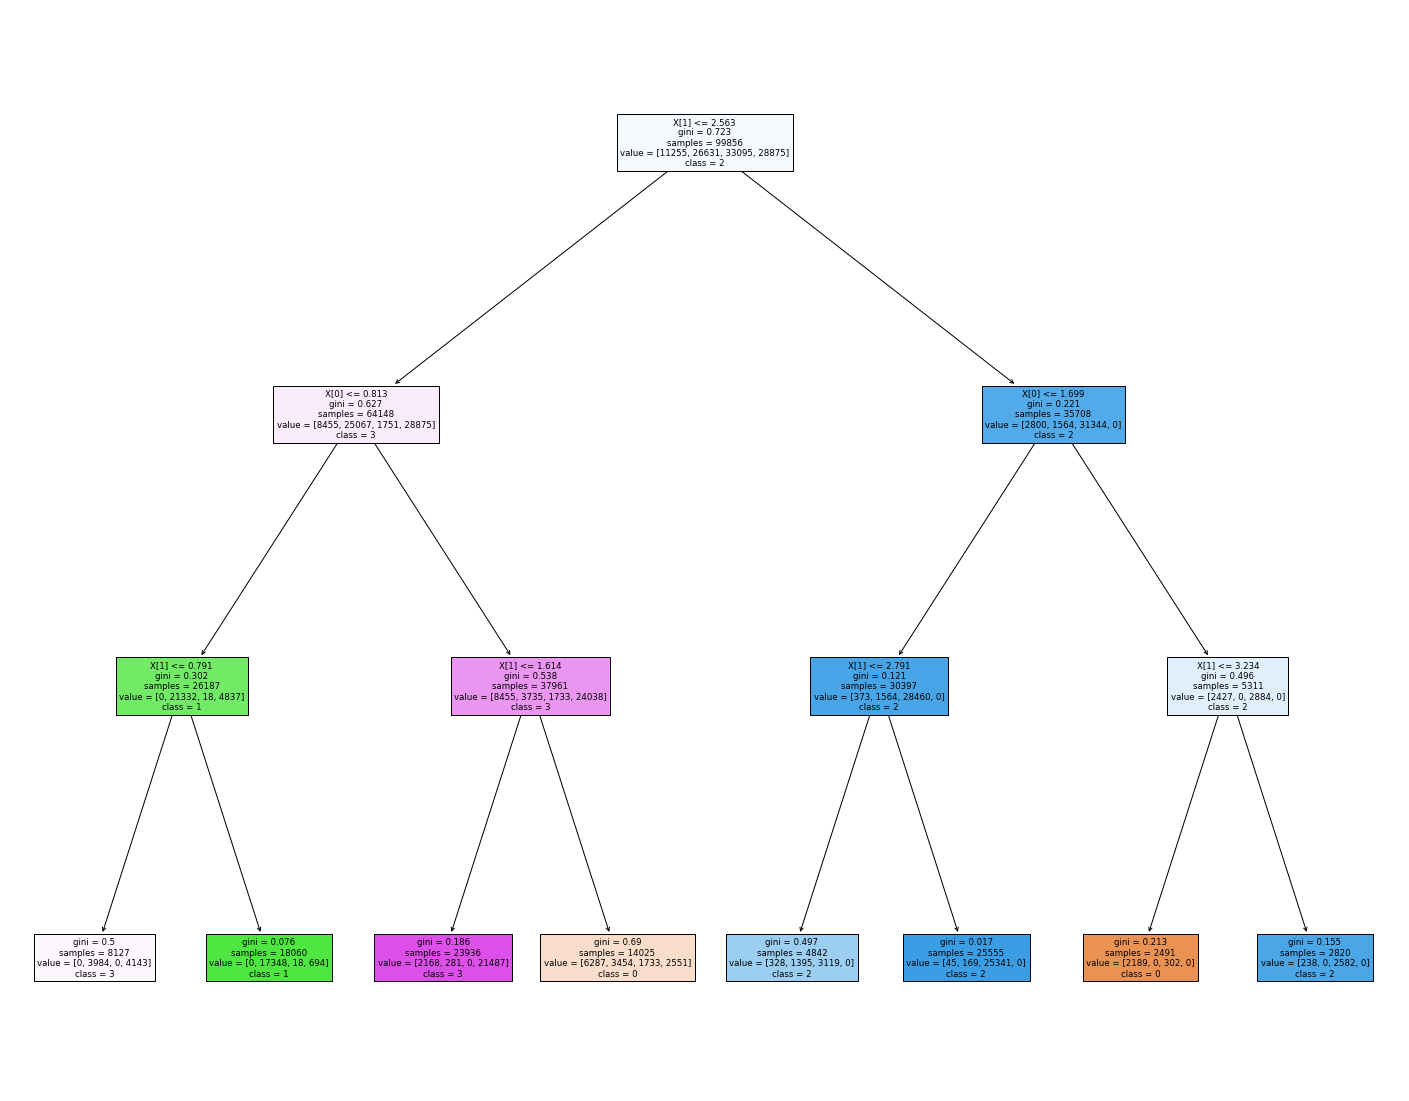

In [19]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [20]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:25<00:00, 396.04it/s]

Instances checked: 10000
Predictions matched: 8239
Accuracy: 82.39%


## DQN 10000 timesteps

In [21]:
# Training an RL agent in the environment using given algorithm
model, agent, train_rewards = algo.dqn(env,10000)

Training for 10000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 131s 13ms/step - reward: -1.4108
done, took 131.276 seconds


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

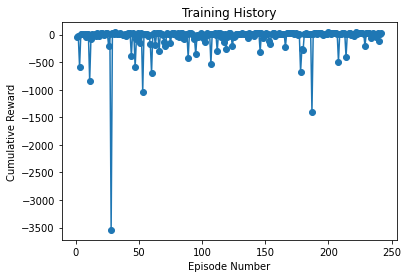

In [22]:
# Visualizing Training History
plt = algo.plot_training(train_rewards)
plt

In [23]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [03:26<00:00, 483.03it/s]


In [24]:
# Building DT from the dataset
Tree = build_tree(env,filename,3)

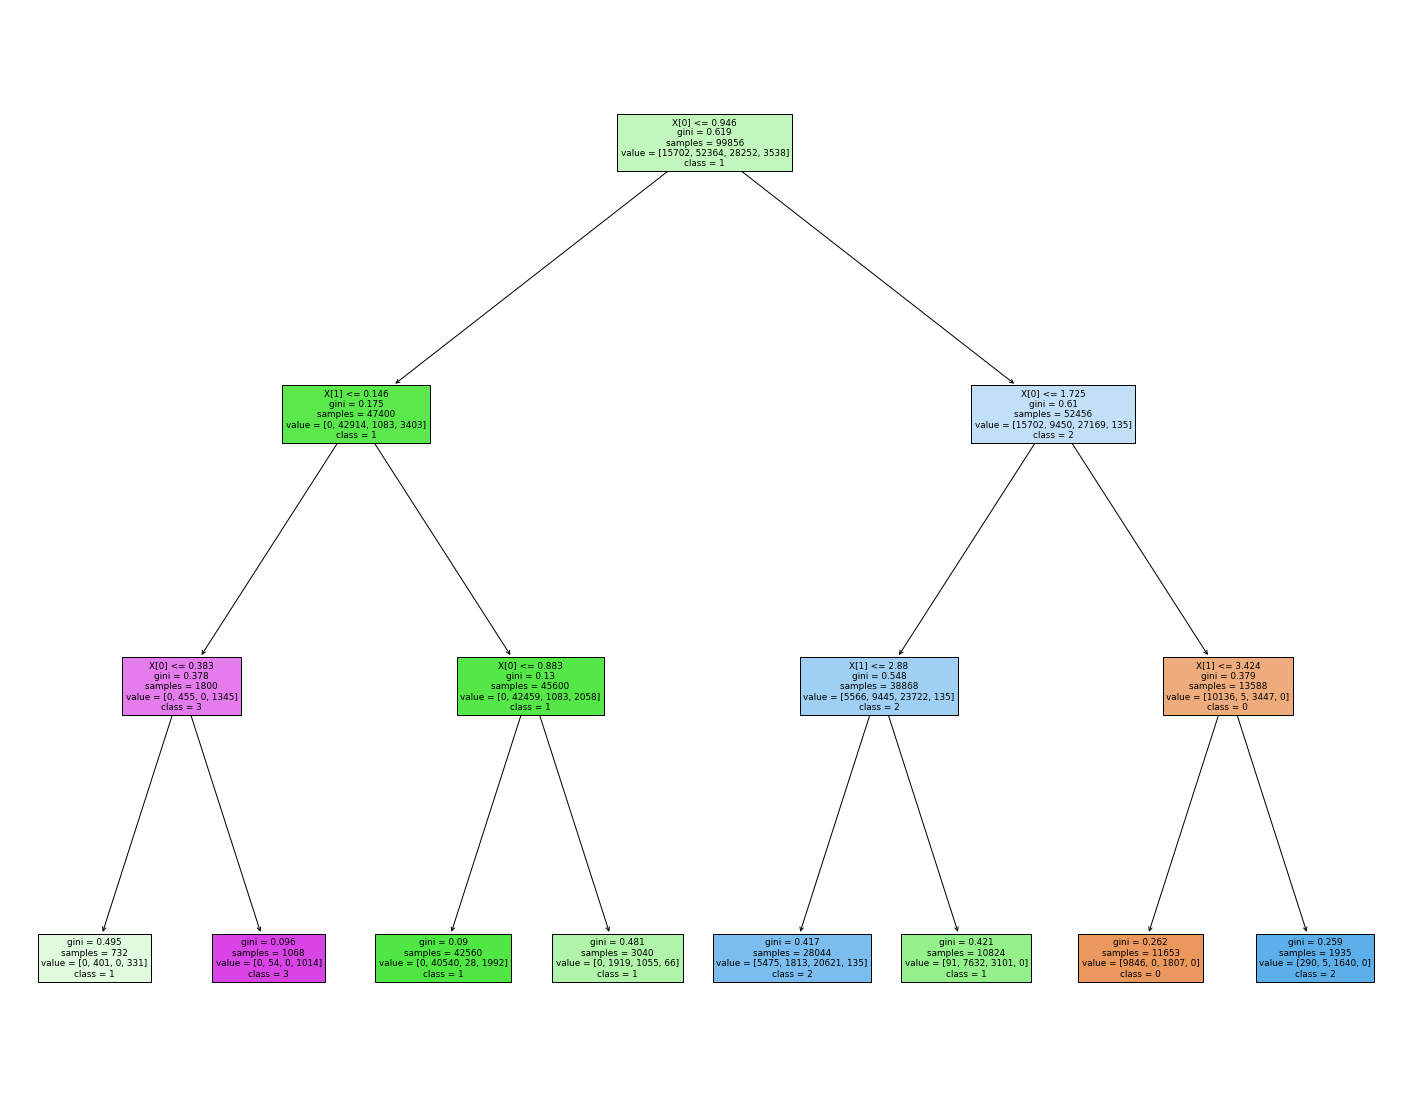

In [25]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [26]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:24<00:00, 410.15it/s]

Instances checked: 10000
Predictions matched: 8396
Accuracy: 83.96%


## DQN 20000 timesteps

In [27]:
# Training an RL agent in the environment using given algorithm
model, agent, train_rewards = algo.dqn(env,20000)

Training for 20000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 134s 13ms/step - reward: -0.9616
307 episodes - episode_reward: -31.117 [-1267.000, 39.000] - loss: 18.469 - mse: 148.798 - mean_q: -11.649

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 138s 14ms/step - reward: -0.4224
done, took 273.044 seconds


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

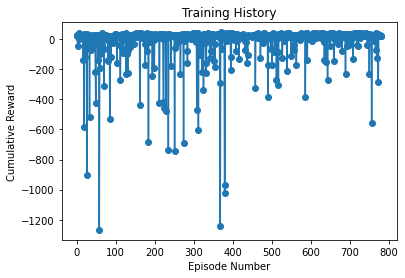

In [28]:
# Visualizing Training History
plt = algo.plot_training(train_rewards)
plt

In [29]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [03:34<00:00, 465.51it/s]


In [30]:
# Building DT from the dataset
Tree = build_tree(env,filename,3)

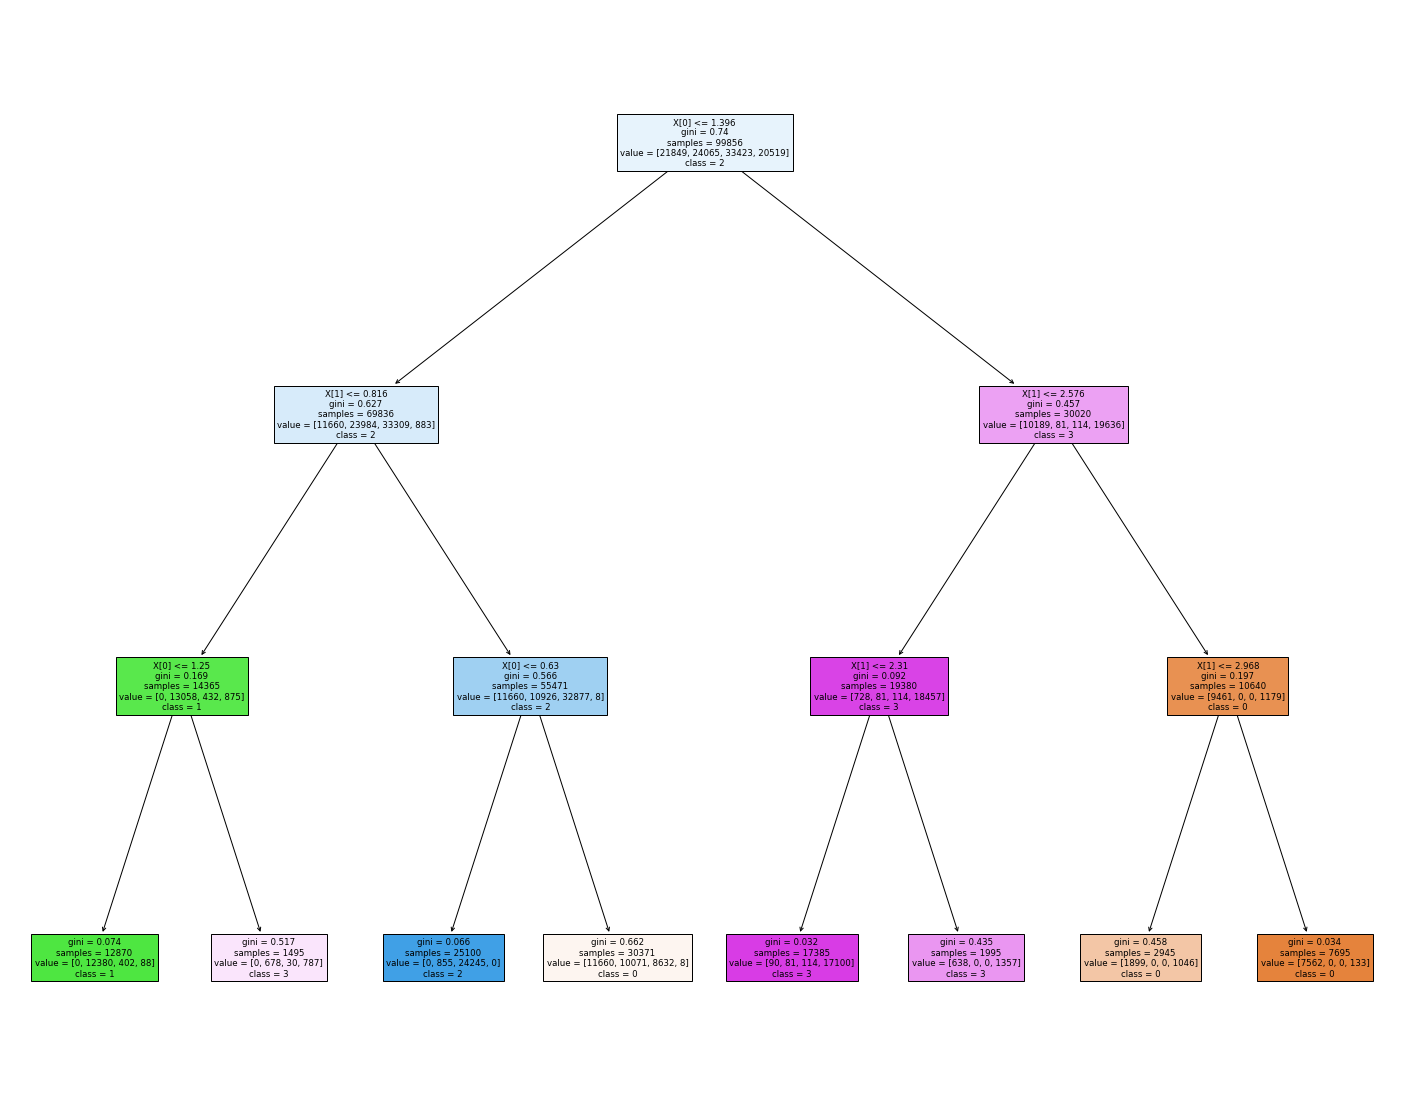

In [31]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [32]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:25<00:00, 390.81it/s]

Instances checked: 10000
Predictions matched: 7801
Accuracy: 78.01%


## DQN 50000 timesteps

In [33]:
# Training an RL agent in the environment using given algorithm
model, agent, train_rewards = algo.dqn(env,50000)

Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 141s 14ms/step - reward: -1.0207
418 episodes - episode_reward: -24.490 [-1793.000, 45.000] - loss: 24.190 - mse: 206.422 - mean_q: -13.557

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 143s 14ms/step - reward: 0.3067
589 episodes - episode_reward: 5.258 [-496.000, 45.000] - loss: 18.264 - mse: 27.254 - mean_q: -1.712

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 148s 15ms/step - reward: 0.5316
622 episodes - episode_reward: 8.531 [-461.000, 45.000] - loss: 12.133 - mse: 30.443 - mean_q: 7.087

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 128s 13ms/step - reward: 0.4487
625 episodes - episode_reward: 7.189 [-624.000, 42.000] - loss: 11.000 - mse: 51.897 - mean_q: 9.331

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 126s 13ms/step - reward: 0.6948
done, took 686.606 seconds


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

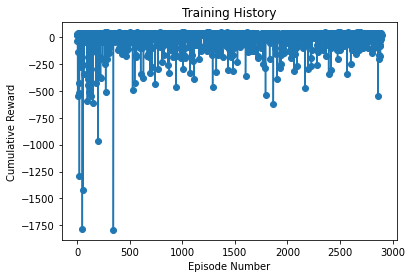

In [34]:
# Visualizing Training History
plt = algo.plot_training(train_rewards)
plt

In [35]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:55<00:00, 568.47it/s]


In [36]:
# Building DT from the dataset
Tree = build_tree(env,filename,3)

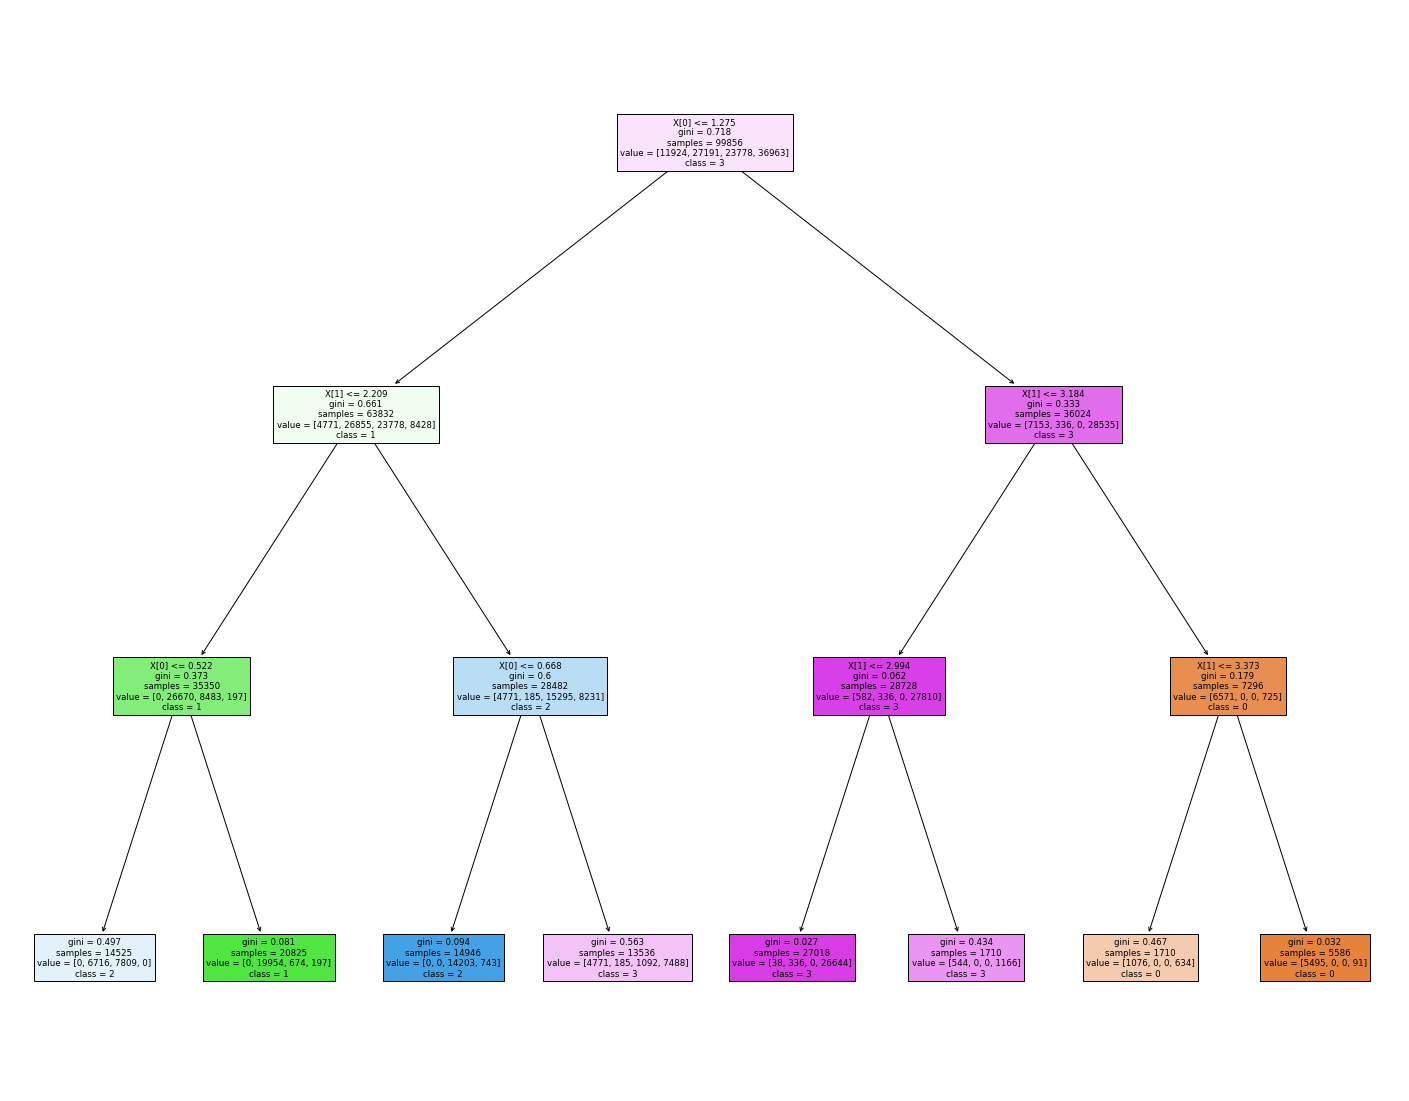

In [37]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [38]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:20<00:00, 478.90it/s]

Instances checked: 10000
Predictions matched: 8455
Accuracy: 84.55%


## DQN 100000 timesteps

In [39]:
# Training an RL agent in the environment using given algorithm
model, agent, train_rewards = algo.dqn(env,100000)

Training for 100000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 114s 11ms/step - reward: -2.2294
193 episodes - episode_reward: -114.902 [-3411.000, 44.000] - loss: 34.802 - mse: 1163.132 - mean_q: -34.332

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 116s 12ms/step - reward: -1.5966
271 episodes - episode_reward: -59.373 [-1622.000, 42.000] - loss: 52.374 - mse: 1635.738 - mean_q: -45.174

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 119s 12ms/step - reward: -1.0358
363 episodes - episode_reward: -28.537 [-1055.000, 43.000] - loss: 45.310 - mse: 1014.929 - mean_q: -35.228

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 124s 12ms/step - reward: -0.0948
506 episodes - episode_reward: -1.860 [-934.000, 44.000] - loss: 32.300 - mse: 405.728 - mean_q: -21.190

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 128s 13ms/step - reward: 0.0542
564 episodes - episode_rewa

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

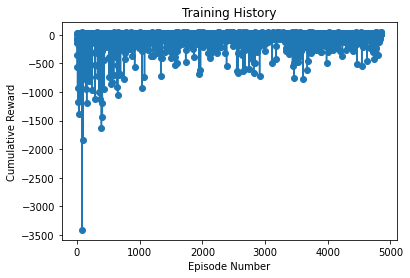

In [40]:
# Visualizing Training History
plt = algo.plot_training(train_rewards)
plt

In [41]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:58<00:00, 558.76it/s]


In [42]:
# Building DT from the dataset
Tree = build_tree(env,filename,3)

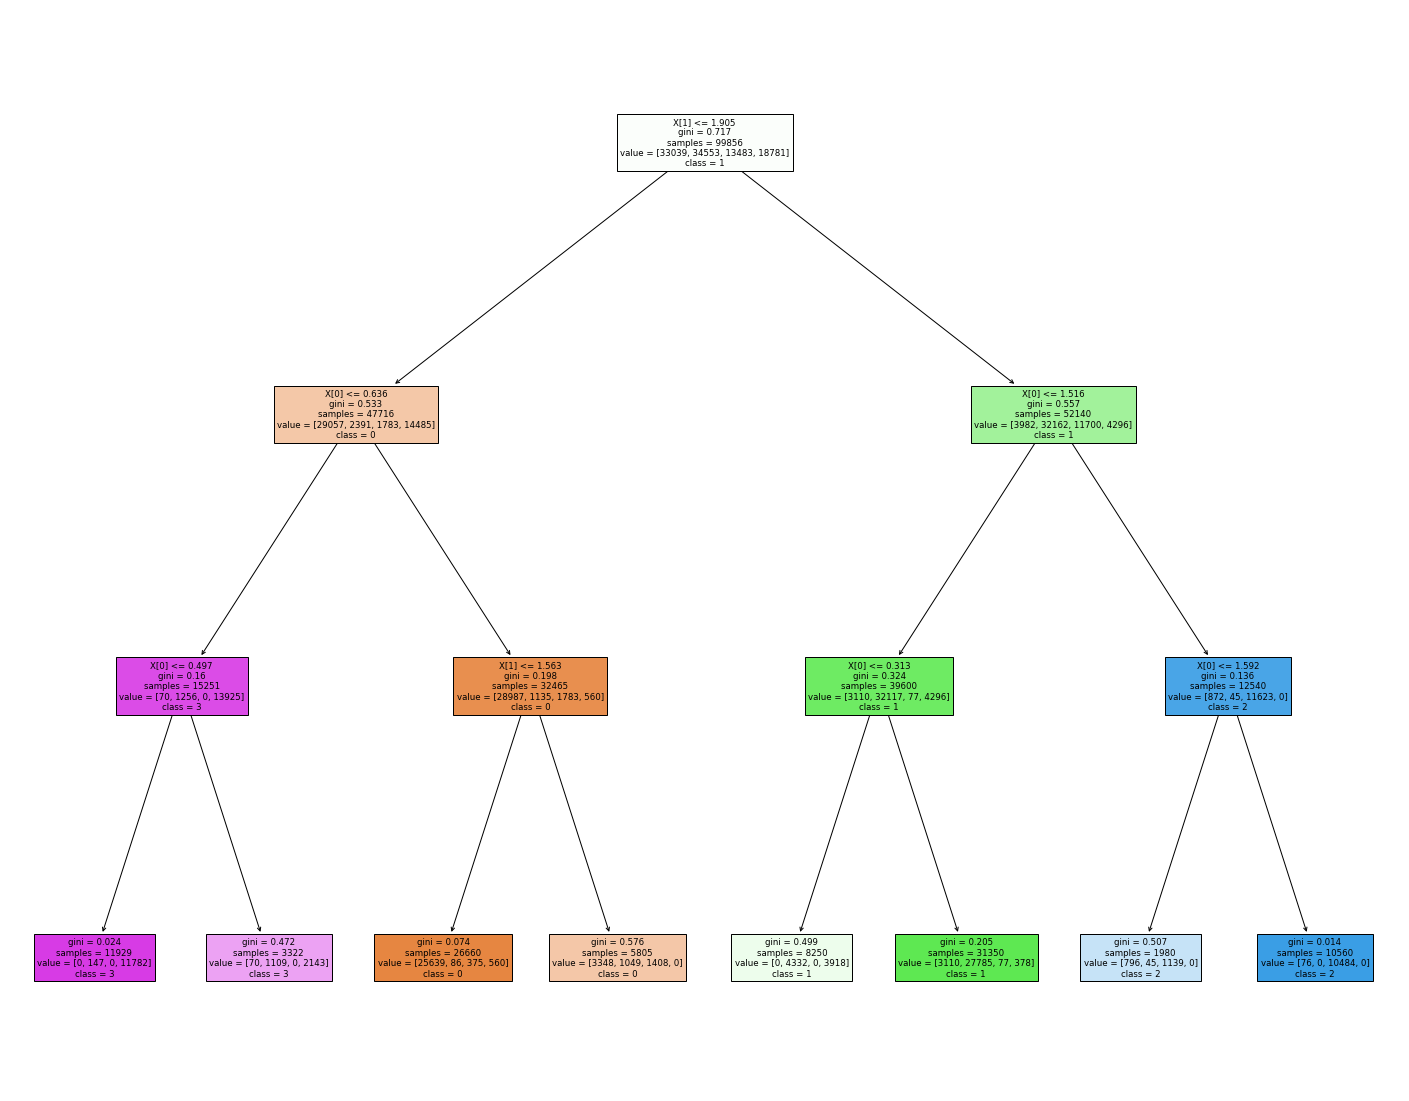

In [43]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [44]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:21<00:00, 472.94it/s]

Instances checked: 10000
Predictions matched: 8679
Accuracy: 86.79%
